In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)
import joblib

# Show plots inline
%matplotlib inline
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


In [3]:
# Step 2: Load dataset
data_path = r"C:\Users\Lenovo\OneDrive\Documents\thyroid_cancer\thyroid_cancer\dataset.csv"

df = pd.read_csv(data_path)
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


✅ Dataset loaded successfully!
Shape: (383, 17)


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [5]:
# Step 3: Data info and missing values
df.info()
print("\nMissing Values per column:")
print(df.isnull().sum())

print("\nBasic Statistics:")
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,383.0,NaN,NaN,NaN,40.866841,15.134494,15.0,29.0,37.0,51.0,82.0
Gender,383,2,F,312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Smoking,383,2,No,334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hx Smoking,383,2,No,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hx Radiothreapy,383,2,No,376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thyroid Function,383,5,Euthyroid,332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Physical Examination,383,5,Multinodular goiter,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adenopathy,383,6,No,277,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pathology,383,4,Papillary,287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Focality,383,2,Uni-Focal,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN


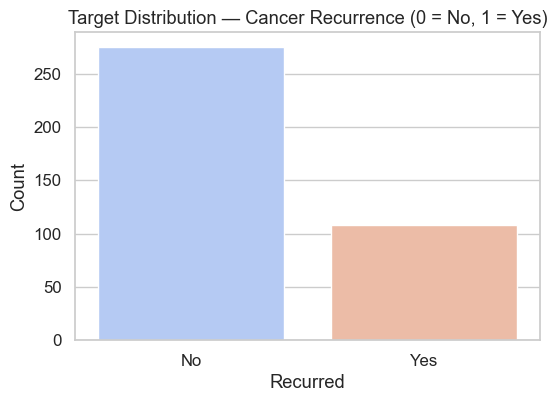

Recurred
No     275
Yes    108
Name: count, dtype: int64


In [7]:
# Step 4: Distribution of target variable
if 'Recurred' in df.columns:
    target_col = 'Recurred'
elif 'recurred' in df.columns:
    target_col = 'recurred'
else:
    raise KeyError("❌ Target column 'Recurred' not found in dataset.")

plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df, hue=target_col, palette='coolwarm')
plt.title('Target Distribution — Cancer Recurrence (0 = No, 1 = Yes)')
plt.xlabel('Recurred')
plt.ylabel('Count')
plt.show()

print(df[target_col].value_counts())


In [9]:
# Step 5: Encode categorical columns
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

# Identify categorical and numeric columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)

# Label encode binary categories (e.g., Male/Female, Yes/No)
le = LabelEncoder()
for col in categorical_cols:
    df[col] = df[col].astype(str).str.lower().replace({'yes':1, 'no':0, 'male':1, 'female':0})
    if df[col].nunique() <= 2:
        df[col] = le.fit_transform(df[col])
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

print("Shape after encoding:", df.shape)


Categorical columns: ['gender', 'smoking', 'hx_smoking', 'hx_radiothreapy', 'thyroid_function', 'physical_examination', 'adenopathy', 'pathology', 'focality', 'risk', 't', 'n', 'm', 'stage', 'response', 'recurred']
Numeric columns: ['age']
Shape after encoding: (383, 41)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_35100\648121099.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].astype(str).str.lower().replace({'yes':1, 'no':0, 'male':1, 'female':0})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_35100\648121099.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].astype(str).str.lower().replace({'yes':1, 'no':0, 'male':1, 'female':0})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_35100\648121099.py:14: FutureWarning: Downcasting behavior in `replace` is deprec

In [11]:
# Step 6: Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)
print("✅ Missing values handled.")


✅ Missing values handled.


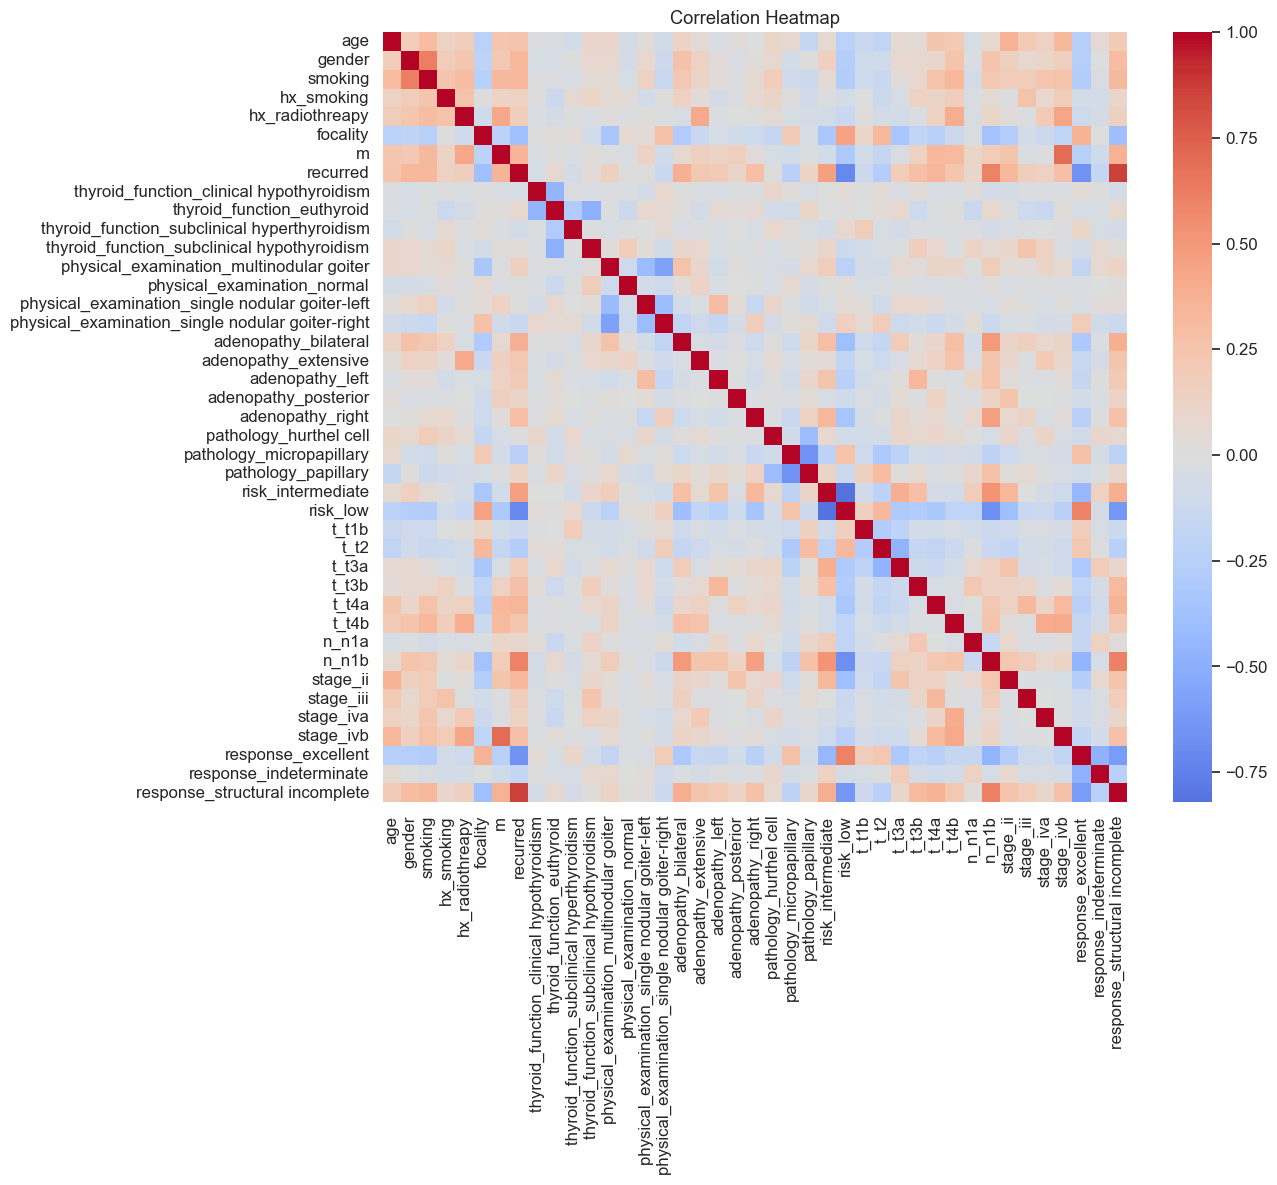

In [13]:
# Step 7: Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


In [17]:
# Step 8: Split data and scale (fixed for lowercase column names)
target_col = 'recurred'  # ensure lowercase after normalization

# Confirm column presence
if target_col not in df.columns:
    print("Available columns:", df.columns.tolist())
    raise KeyError(f"Target column '{target_col}' not found in dataset!")

X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
scaled_cols = X_train.select_dtypes(include=[np.number]).columns

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[scaled_cols] = scaler.fit_transform(X_train[scaled_cols])
X_test_scaled[scaled_cols] = scaler.transform(X_test[scaled_cols])

print("Train shape:", X_train.shape, " | Test shape:", X_test.shape)


Train shape: (306, 40)  | Test shape: (77, 40)


Logistic Regression Accuracy: 0.9610

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        55
           1       1.00      0.86      0.93        22

    accuracy                           0.96        77
   macro avg       0.97      0.93      0.95        77
weighted avg       0.96      0.96      0.96        77



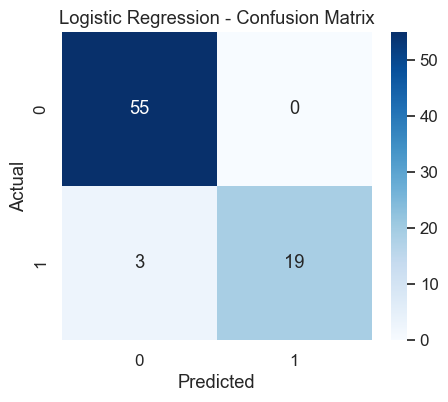

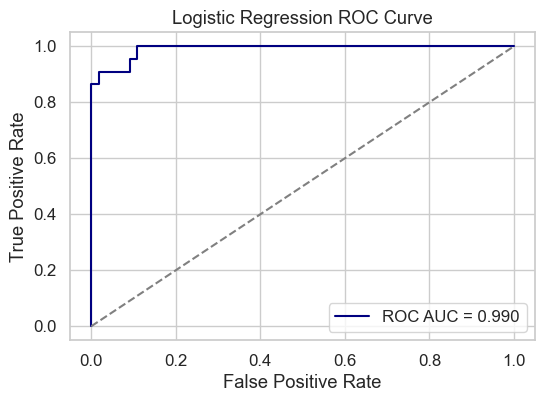

In [19]:
# Step 9: Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)
y_proba_log = log_model.predict_proba(X_test_scaled)[:,1]

log_acc = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {log_acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_log)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.3f}', color='navy')
plt.plot([0,1], [0,1], '--', color='gray')
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Best Parameters: {'max_depth': 6, 'n_estimators': 200}
Random Forest Accuracy: 0.9610

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        55
           1       1.00      0.86      0.93        22

    accuracy                           0.96        77
   macro avg       0.97      0.93      0.95        77
weighted avg       0.96      0.96      0.96        77



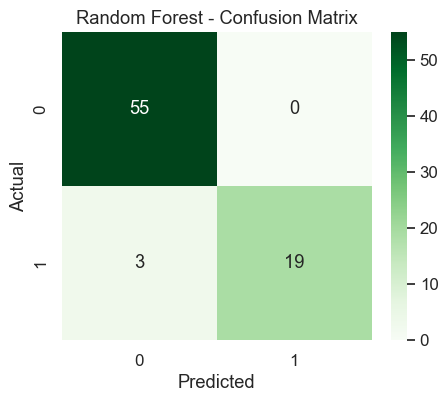

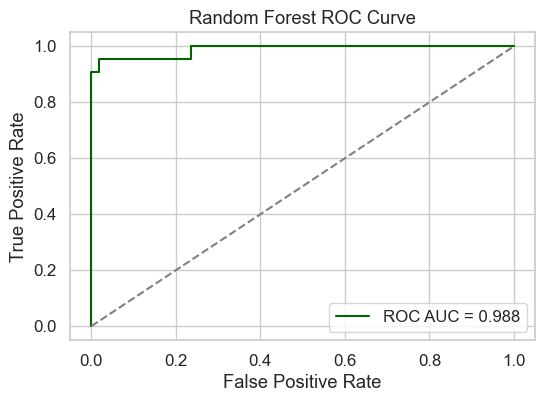

In [21]:
# Step 10: Random Forest Model
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 6, 10]
}

cv = GridSearchCV(rf, param_grid, cv=4, scoring='accuracy', n_jobs=-1)
cv.fit(X_train_scaled, y_train)

print("Best Parameters:", cv.best_params_)
best_rf = cv.best_estimator_

y_pred_rf = best_rf.predict(X_test_scaled)
y_proba_rf = best_rf.predict_proba(X_test_scaled)[:,1]

rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6,4))
plt.plot(fpr_rf, tpr_rf, label=f'ROC AUC = {roc_auc_rf:.3f}', color='darkgreen')
plt.plot([0,1], [0,1], '--', color='gray')
plt.title('Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [23]:
# Step 11: Select best model and save
if rf_acc >= log_acc:
    best_model = best_rf
    model_name = "RandomForest"
    best_score = rf_acc
else:
    best_model = log_model
    model_name = "LogisticRegression"
    best_score = log_acc

print(f"✅ Selected Model: {model_name} | Accuracy: {best_score:.4f}")

save_path = r"C:\Users\Lenovo\OneDrive\Documents\thyroid_cancer\thyroid_cancer\thyroid_cancer_model.pkl"

joblib.dump({
    'model': best_model,
    'scaler': scaler,
    'feature_columns': X.columns.tolist()
}, save_path)

print(f"Model saved successfully at: {save_path}")


✅ Selected Model: RandomForest | Accuracy: 0.9610
Model saved successfully at: C:\Users\Lenovo\OneDrive\Documents\thyroid_cancer\thyroid_cancer\thyroid_cancer_model.pkl


In [25]:
# Step 12: Example prediction
loaded = joblib.load(save_path)
model = loaded['model']
scaler = loaded['scaler']
features = loaded['feature_columns']

sample = X_train.median().to_frame().T
sample[scaled_cols] = scaler.transform(sample[scaled_cols])

pred = model.predict(sample)
proba = model.predict_proba(sample)[:,1]

print("\nExample Prediction:")
print("Predicted Class:", int(pred[0]))
print("Predicted Probability of Recurrence:", float(proba[0]))



Example Prediction:
Predicted Class: 0
Predicted Probability of Recurrence: 0.009784688019271298


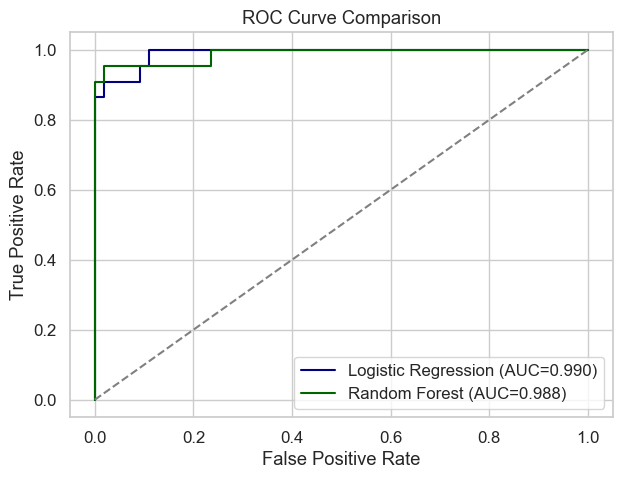

In [27]:
# Step 13: Compare both models' ROC curves
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC={roc_auc:.3f})', color='navy')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={roc_auc_rf:.3f})', color='darkgreen')
plt.plot([0,1], [0,1], '--', color='gray')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
